In [ ]:
from keras.datasets import mnist
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()
from matplotlib import pyplot as plt
import numpy as np

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
from keras import models
from keras.layers import Dense
from keras.models import Sequential

model = Sequential()
#lop an thu 1
# theo kinh nghiệm thì đặt 512
model.add(Dense(1024, activation ='relu', input_shape = (28*28,), name = 'layer1'))
#lop an thu 2
model.add(Dense(512,activation = 'relu', name = 'Layer2'))
#lop an thu 3
model.add(Dense(256,activation = 'relu', name = 'Layer3'))
#lop an thu 4
model.add(Dense(10, activation='softmax',name = 'Layer4'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 1024)              803840    
                                                                 
 Layer2 (Dense)              (None, 512)               524800    
                                                                 
 Layer3 (Dense)              (None, 256)               131328    
                                                                 
 Layer4 (Dense)              (None, 10)                2570      
                                                                 
Total params: 1,462,538
Trainable params: 1,462,538
Non-trainable params: 0
_________________________________________________________________


so nay la:  3


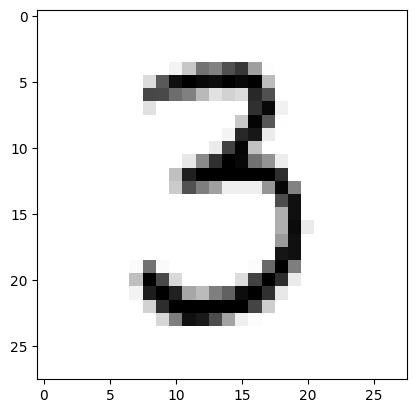

In [ ]:
from matplotlib import pyplot as plt
hinh = train_images[50]
plt.imshow(hinh, cmap = plt.cm.binary)
plt.show
print('so nay la: ', train_labels[50])

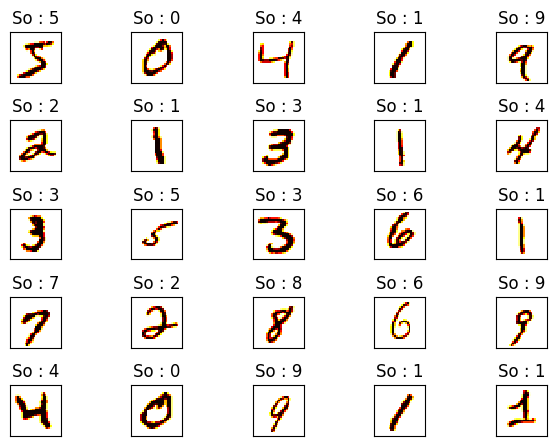

In [ ]:
for i in range (25):
  plt.subplot(5,5,i+1)
  plt.tight_layout()
  plt.imshow(train_images[i],cmap='hot_r', interpolation = 'none')
  plt.title('So : {}'.format(train_labels[i]))
  plt.xticks([])
  plt.yticks([])

In [ ]:
train_images = train_images.reshape((60000,28*28)) # chia hinh anh 2D thanh 1D de khop voi input network
train_image = train_images.astype('float32')/255   # vi anh la cac day mau tu 0 den 255 nen phai chuyen thanh kieu so thuc 

test_images = test_images.reshape((10000, 28*28))
test_image = test_images.astype('float32')/255

from keras.utils import to_categorical # one hot encoding cho output
train_labels = to_categorical(train_labels,10)
test_labels = to_categorical(test_labels,10)



In [ ]:
model.compile (optimizer = 'rmsprop', loss = 'categorical_crossentropy',metrics = ['accuracy'])
model.fit(train_images, train_labels, epochs = 30, batch_size = 128)

Epoch 1/30
469/469 [==============================] - 20s 40ms/step - loss: 4.7687 - accuracy: 0.8760
Epoch 2/30
469/469 [==============================] - 19s 40ms/step - loss: 0.2280 - accuracy: 0.9466
Epoch 3/30
469/469 [==============================] - 20s 43ms/step - loss: 0.1712 - accuracy: 0.9595
Epoch 4/30
469/469 [==============================] - 18s 38ms/step - loss: 0.1482 - accuracy: 0.9665
Epoch 5/30
469/469 [==============================] - 18s 39ms/step - loss: 0.1276 - accuracy: 0.9721
Epoch 6/30
469/469 [==============================] - 17s 37ms/step - loss: 0.1180 - accuracy: 0.9753
Epoch 7/30
469/469 [==============================] - 18s 39ms/step - loss: 0.1070 - accuracy: 0.9778
Epoch 8/30
469/469 [==============================] - 17s 37ms/step - loss: 0.1109 - accuracy: 0.9789
Epoch 9/30
469/469 [==============================] - 17s 37ms/step - loss: 0.1019 - accuracy: 0.9796
Epoch 10/30
469/469 [==============================] - 18s 39ms/step - loss: 0.100

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Do chinh xac tren tap kiem tra: ',test_acc)
print('Ham mat mat tren tap kiem tra: ', test_loss)

313/313 [==============================] - 2s 6ms/step - loss: 0.6685 - accuracy: 0.9772
Do chinh xac tren tap kiem tra:  0.9771999716758728
Ham mat mat tren tap kiem tra:  0.6684995293617249


1/1 [==============================] - 0s 35ms/step
So nay la:  8


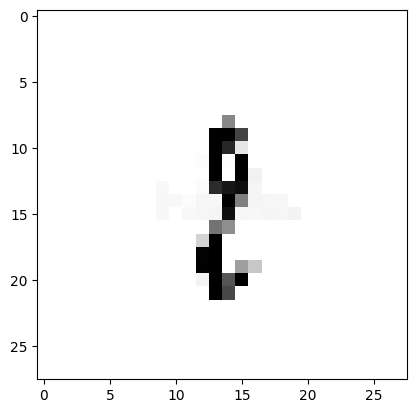

In [16]:
from keras.utils import load_img
from keras.utils.image_utils import img_to_array 

url = 'fo_8_2.png'
img = load_img(url)
#plt.imshow(img)

img = load_img(url,target_size = (28,28))
plt.imshow(img)
img = img_to_array(img)
img = img[:,:,0]
img = img.reshape((1,28*28))
img = img.astype('float32')/255
so = int(np.argmax(model.predict(img),axis =1))
print("So nay la: ",so)

In [ ]:
#save
model.save('mnist_w9.h')

In [18]:
from keras.models import load_model
model1=load_model('mnist_w9.h')

In [19]:
test_loss, test_acc = model1.evaluate(test_images, test_labels)
print('Do chinh xac tren tap kiem tra: ',test_acc)
print('Ham mat mat tren tap kiem tra: ', test_loss)

313/313 [==============================] - 3s 8ms/step - loss: 0.6685 - accuracy: 0.9772
Do chinh xac tren tap kiem tra:  0.9771999716758728
Ham mat mat tren tap kiem tra:  0.6684995293617249
